In [259]:
#import packages
import numpy as np
from random import random, seed
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sklearn.linear_model as skl

In [260]:
#define Franke function
def FrankeFunction(x,y): #still got one division in here
    term1 = 0.75*np.exp(-(0.25*(9*x-2)*(9*x-2)) - 0.25*((9*y-2)*(9*y-2)))
    term2 = 0.75*np.exp(-((9*x+1)*(9*x+1))/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)*(9*x-7)*0.25 - 0.25*((9*y-3)*(9*y-3)))
    term4 = -0.2*np.exp(-(9*x-4)*(9*x-4) - (9*y-7)*(9*y-7))
    return term1 + term2 + term3 + term4

In [261]:
# create model matrix
# Form is: x0y0, x1y0, x2y0, x0y1, x1y1, x0y2
def Model(x,y,P): # P is polynomial degree
    m = len(x)*len(y) # number of equations
    t = sum(range(P+2)) # number of terms in polynomial
    X = np.zeros((m,t)) # Model matrix
    a = np.matrix.flatten(x)
    b = np.matrix.flatten(y)
    c = 0 #counter
    for i in range(P+1):
        for j in range(P+1-i):
            X[:,c] = a**j*b**i
            c +=1
    return X

In [262]:
#define R2 function
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_model)) ** 2)

In [263]:
#define MSE function
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

In [264]:
#define variance function
def Var(y_data, y_model,P,X):
    N = len(y_data)
    covar = np.linalg.inv(X.T.dot(X))#sigma2
    vari = np.diagonal(covar)
    return vari

In [265]:
#Create random variables/predictors
np.random.seed(1234)
N = 200 #points along x and y axes

x = np.random.uniform(0,1,N)
y = np.random.uniform(0,1,N)

# x = np.arange(1,3,1)
# y = np.arange(3,5,1)

x, y = np.meshgrid(x,y,sparse=False)

#create datapoints/results
z = FrankeFunction(x, y)

# Create noise
Noise = 0.5*np.random.randn(N,N) #ask how noise should be added. NxN?

#add noise
z_n = z+Noise

#flatten for use in functions
z_n = np.matrix.flatten(z_n)
z = np.matrix.flatten(z)

#added a 0 Ridge parameter
_lambda = 0.0

In [266]:
MPD =5 #maximal polynomial degree

X = Model(x,y,MPD) #create model matrix

In [267]:
def NoResampling(X,z_n,_lambda):
    beta = np.linalg.inv(X.T.dot(X)-_lambda*np.eye(len(X[0][:]))).dot(X.T).dot(z_n)

    ztilde = X @ beta
    
    return MSE(z_n,ztilde), R2(z_n,ztilde)

In [268]:
NoResampling(X,z_n,0)

(0.25134932205283894, 0.21556732290514102)

In [269]:
# find parameters
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(z_n)

# make prediction
ztilde = X @ beta

In [270]:
######  Makes model matrix, looks different than mine #####
# form: x0y0, x1y0, x0y1, x2y0, x1y1, x0y2
# poly2 = PolynomialFeatures(degree=MPD)
# a = x[:,np.newaxis]
# b = y[:,np.newaxis]
# cc = np.c_[a,b]
# Xskl = poly2.fit_transform(cc) 
##########################################################
# THIS CELL IS CURRENTLY NOT IN USE #

In [271]:
# find parameters
clf = skl.LinearRegression(fit_intercept=False) #False to not center data, i.e. intercept is not 0
clf.fit(X,z_n) 

#make prediction
zpredict = clf.predict(X)

In [272]:
# The mean squared error              
print("Mean squared error (self): %.5f" % MSE(z_n, ztilde))
print("Mean squared error (skl): %.5f" % mean_squared_error(z_n, zpredict))

# Explained variance score: 1 is perfect prediction     
print('R2 score (self): %.5f' %R2(z_n, ztilde))
print('R2 score (skl): %.5f' % r2_score(z_n, zpredict))

Mean squared error (self): 0.25135
Mean squared error (skl): 0.25135
R2 score (self): 0.21557
R2 score (skl): 0.21557


In [273]:
print(Var(z_n, ztilde, MPD,X))
print(Var(z_n,zpredict,MPD,X))

[7.55227583e-03 9.61238982e-01 2.15525118e+01 1.05272993e+02
 1.12662593e+02 1.71913430e+01 9.57850488e-01 1.25105603e+01
 5.57881794e+01 6.46391594e+01 1.28782868e+01 2.19658399e+01
 5.62624923e+01 5.42690697e+01 1.13243930e+01 1.06146184e+02
 6.43402927e+01 1.19071661e+01 1.10817552e+02 1.26556959e+01
 1.64554588e+01]
[7.55227583e-03 9.61238982e-01 2.15525118e+01 1.05272993e+02
 1.12662593e+02 1.71913430e+01 9.57850488e-01 1.25105603e+01
 5.57881794e+01 6.46391594e+01 1.28782868e+01 2.19658399e+01
 5.62624923e+01 5.42690697e+01 1.13243930e+01 1.06146184e+02
 6.43402927e+01 1.19071661e+01 1.10817552e+02 1.26556959e+01
 1.64554588e+01]


In [274]:
print(beta)
print(clf.coef_)

[ 3.84405851e-01  7.34606830e+00 -3.16234928e+01  4.26441529e+01
 -1.86935312e+01 -3.13006733e-02  4.35158695e+00 -1.49635132e+01
  4.46444380e+01 -5.23820769e+01  1.81108818e+01 -1.23130532e+01
  1.94753339e+01 -9.71854957e+00  1.17299074e+01  1.73811663e+00
 -2.63185177e+01 -5.20217757e+00  1.78159692e+01  1.48962160e+01
 -1.18052030e+01]
[ 3.84405851e-01  7.34606830e+00 -3.16234928e+01  4.26441529e+01
 -1.86935312e+01 -3.13006740e-02  4.35158695e+00 -1.49635132e+01
  4.46444380e+01 -5.23820770e+01  1.81108818e+01 -1.23130532e+01
  1.94753339e+01 -9.71854957e+00  1.17299074e+01  1.73811662e+00
 -2.63185176e+01 -5.20217757e+00  1.78159692e+01  1.48962160e+01
 -1.18052030e+01]


In [275]:
std = 1.96*np.sqrt(Var(z_n, ztilde, MPD,X))
print(std)

[ 0.17033151  1.9216388   9.09923784 20.11011508 20.80395675  8.12663912
  1.91824879  6.932573   14.63953107 15.75810251  7.03372067  9.18607482
 14.70163224 14.43883853  6.59574015 20.19334494 15.72163059  6.76332531
 20.6329035   6.9726696   7.95080439]


In [276]:
# 95% CI: mu +-1.96*sigma

In [277]:
np.sqrt(0.271633)

0.5211842284643694

# b

In [278]:
k = 10 # number of folds
partition = 0.2 # percentage of data to use for testing
# sMSE = 0 #sum mean squared error
# sR2 = 0 #sum R2 score

In [279]:
def kFold(k,X,z_n):
    partition = 0.2 # percentage of data to use for testing
    sMSE = 0 #sum mean squared error
    sR2 = 0 #sum R2 score
    divide = int((1-partition)*len(X))
    
    for i in range(k):
        # Split data
        X_train = X[:divide][:]
        X_test = X[divide:][:]
        z_train = z_n[:divide]
        z_test = z_n[divide:]
        
        # find parameters
        beta = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(z_train)

        # make prediction
        z_tilde = X_test @ beta

        # sum of MSE and R2, remember to divide by k later
        sMSE += MSE(z_test,z_tilde)
        sR2 += R2(z_test,z_tilde)

        # Prepare data for next fold
        X = np.roll(X,len(X_test),axis=0) # Rolls matrix downwards before next split
        z_n = np.roll(z_n,len(X_test)) # Roll
    
    return sMSE/k, sR2/k

In [280]:
def kFoldRidge(k,X,z_n,_lambda):
    partition = 0.2 # percentage of data to use for testing
    sMSE = 0 #sum mean squared error
    sR2 = 0 #sum R2 score
    divide = int((1-partition)*len(X))
    
    for i in range(k):
        # Split data
        #own splitting
        X_train = X[:divide][:]
        X_test = X[divide:][:]
        z_train = z_n[:divide]
        z_test = z_n[divide:]
        # Skl splitting

        
        # find parameters
        beta = np.linalg.inv(X_train.T.dot(X_train)-_lambda*np.eye(len(X[0][:]))).dot(X_train.T).dot(z_train)

        # make prediction
        z_tilde = X_test @ beta

        # sum of MSE and R2, remember to divide by k later
        sMSE += MSE(z_test,z_tilde)
        sR2 += R2(z_test,z_tilde)

        # Prepare data for next fold
        X = np.roll(X,len(X_test),axis=0) # Rolls matrix downwards before next split
        z_n = np.roll(z_n,len(X_test)) # Roll
    
    return sMSE/k, sR2/k

In [289]:
def kFoldLassoCV(k,X,z_n,_lambda):
    partition = 0.2 #Percentage of data to use for testing

    #How to select good tolerances and max iters?
    reg = skl.LassoCV(alphas=_lambda,cv = k, random_state = 0,tol=0.0001,max_iter = 100000).fit(X_train,z_train)
    ztilde = reg.predict(X_test)
    plt.figure()
    plt.semilogx(reg.alphas_,reg.mse_path_)
    plt.semilogx(reg.alphas_,reg.mse_path_.mean(axis=-1),'k')
    plt.xlabel('Log-plot of lambdas')
    plt.ylabel('Mean squared errors')
    plt.show()
    return mean_squared_error(ztilde,z_test), r2_score(ztilde,z_test)

In [290]:
def kFoldLasso(k,X,z_n,_lambda):
    partition = 0.2 # percentage of data to use for testing
    sMSE = 0 #sum mean squared error
    sR2 = 0 #sum R2 score
#     X_train, X_test, z_train, z_test = train_test_split(X,z_n,test_size=partition,shuffle=False )

    for i in range(k):
        X_train, X_test, z_train, z_test = train_test_split(X,z_n,test_size=partition,shuffle=False )

        lass = skl.Lasso(alpha=_lambda)
        lass.fit(X_train,z_train)
        ztilde = lass.predict(X_test)
#         print(np.shape(ztilde),np.shape(z_test))
#         # find parameters
#         beta = np.linalg.inv(X_train.T.dot(X_train)-_lambda*np.eye(len(X[0][:]))).dot(X_train.T).dot(z_train)

#         # make prediction
#         z_tilde = X_test @ beta

#         # sum of MSE and R2, remember to divide by k later
#         sMSE += MSE(z_test,z_tilde)
#         sR2 += R2(z_test,z_tilde)
        sMSE += mean_squared_error(ztilde,z_test)
        sR2 += r2_score(ztilde,z_test)
        # Prepare data for next fold
        X = np.roll(X,len(X_test),axis=0) # Rolls matrix downwards before next split
        z_n = np.roll(z_n,len(X_test)) # Roll
    
    return sMSE/k, sR2/k

# c

In [291]:
MPD = [1,2,3,4,5]
MSE_degree = []

for i in MPD:
    X = Model(x,y,i)
    dMSE, dR2 = kFold(k,X,z_n)
#     dMSE, dR2 = NoResampling(X,z_n,0)
    MSE_degree.append(dMSE)

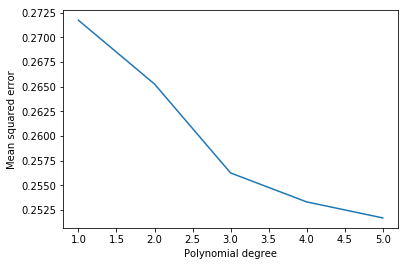

In [293]:
plt.figure()
plt.plot(MPD,MSE_degree)
plt.xlabel('Polynomial degree')
plt.ylabel('Mean squared error')
plt.show()

It seems the model complexity isnt high enough for the curve to have a minimum like Hastie 2.11. To increase model complexity, a different inversion method is required, due to round-off-error, or what its called.

# d

In [294]:
_lambda = np.logspace(-4,5,10)

RidgeMSE = np.zeros((len(MPD),len(_lambda)))
RidgeR2 = np.zeros((len(MPD),len(_lambda)))

for i,mpd in enumerate(MPD):
    X = Model(x,y,mpd)
    for j,lam in enumerate(_lambda):
#         rMSE,rR2 = NoResampling(X,z_n,lam)
        rMSE,rR2 = kFoldRidge(k,X,z_n,lam)
        RidgeMSE[i][j] = rMSE
        RidgeR2[i][j] = rR2

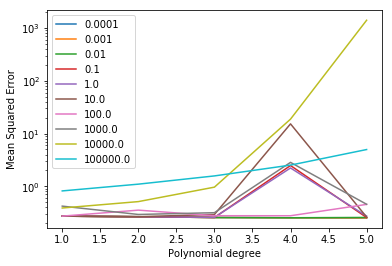

In [295]:
plt.figure()

for i in range(len(_lambda)):
    plt.semilogy(MPD,RidgeMSE[:,i],label=_lambda[i])
plt.xlabel('Polynomial degree')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

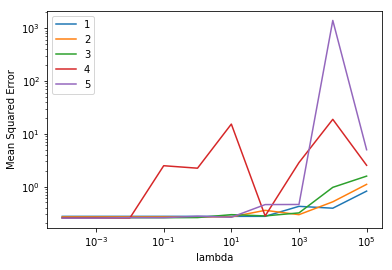

In [296]:
plt.figure()

for i in range(len(MPD)):
    plt.loglog(_lambda,RidgeMSE[i,:],label=i+1)
plt.xlabel('lambda')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# e

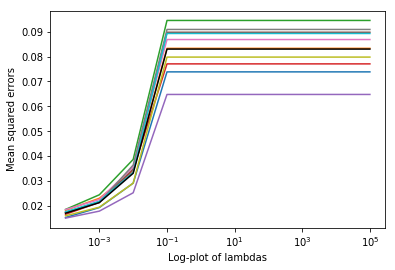

(0.017852740026684657, 0.7152617510185606)

In [297]:
# I'll use Scikit-learn as recommended for this
kFoldLassoCV(k,X,z_n,_lambda)
